* [Basics](#basics)
    * [Usage](#usage) 
    * [Data](#data)
    * [Plot creation](#plot-creation)
        * [Layers, aesthetics, mappings, and scales](#layers-aesthetics-mappings-and-scales)
        * [Scale parameters: axis and legend](#scale-parameters-axis-and-legend)
        * [Global X and Y mappings and scales](#global-x-axis-and-y-axis-mappings-and-scales)
        * [Raw source mapping](#raw-source-mapping)
* [Kotlin DataFrame API](#kotlin-dataframe-api)
* [Grouping](#grouping)
    * [Implicit grouping](#implicit-grouping)
    * [Position](#position)
* [Experimental](#experimental)
    * [Multiplot](#multiplot)
        * [Plot grid](#plot-grid)
        * [Plot bunch](#plot-bunch)
        * [Faceting](#faceting)
    * [Statistics](#statistics)
    * [Layout](#layout)
        * [Title, subtitle, caption, and size](#title-subtitle-caption-and-size)
        * [Themes](#themes)
    * [Custom themes](#custom-themes)
    * [Custom scales](#custom-scales)
    * [Tooltips](#tooltips)
    * [Export](#export)

# Basics

### Usage

#### Notebooks
To integrate Kandy and Dataframe into an interactive notebook, use the following commands:

In [1]:
// Fetches the latest versions
%useLatestDescriptors
// Adds the dataframe library with the latest version
%use dataframe
// Adds the kandy library with the latest version
%use kandy

> Without specifying `%useLatestDescriptors`,
> the version included in the Kotlin Jupyter kernel will be used.

#### Gradle
To include Kandy in your Gradle project, add the following to your dependencies:

```kotlin
dependencies {
    implementation("org.jetbrains.kotlinx:kandy-lets-plot:%kandy_latest_version%")
}
```

### Data

In Kandy, the primary data model for plotting is a _"named data"_ or _"dataframe"_.
This model comprises a set of named columns with values of equal length.
The input data should be structured as `Map<String, List<*>>`.

Example of a simple dataset in Kandy:

In [2]:
val o = ""
val simpleDataset = mapOf(
    "time, ms" to listOf(12, 87, 130, 149, 200, 221, 250),
    "relativeHumidity" to listOf(0.45, 0.3, 0.21, 0.15, 0.22, 0.36, 0.8),
    "flowOn" to listOf(true, true, false, false, true, false, false),
    ""
)

To reference dataset columns in your plots, create pointers for each column. There are several ways to do this:

In [3]:
// 1. Using the `column()` function with the specified column type and name:
val timeMs = column<Int>("time, ms")
// 2. Utilizing the String API, similar to the method above, but using String invocation:
val humidity = "relativeHumidity"<Double>()
// 3. Delegating an unnamed column - its name will be derived from the variable name:
val flowOn by column<Boolean>()

### Plot creation

In Kandy, to create a plot, you start by calling the `plot()` function and passing your dataset as an argument.
This function establishes a context within which you can add various layers to your plot.

A _layer_ is essentially a collection of mappings from your data to the visual attributes of the plot,
known as _aesthetic attributes_.
These attributes define how your data is represented visually, such as through points, lines, or bars.

Here's an example demonstrating the creation of a plot with a single layer:

In [4]:
plot(simpleDataset) {
    points {
        // Maps values from the "time, ms" column to the X-axis
        x(timeMs)
        // Maps values from the "relativeHumidity" column to the Y-axis
        y(humidity)
        // Sets the size of the points to 4.5
        size = 4.5
        // Maps values from the "flowOn" column to the color attribute
        color(flowOn)
        
        flowOn
        
        
        timeMs
        
        
        
        
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Bc8kcY"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false],
"time, ms":[12.0,87.0,130.0,149.0,200.0,221.0,250.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"time, ms",
"y":"relativeHumidity",
"color":"flowOn"
},
"stat":"identity",
"size":4.5,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("Bc8kcY");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 150
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 250
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.3
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.5
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.7
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 time, ms
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

#### Layers, aesthetics, mappings, and scales

Each plot layer is defined by its _geometrical entity_ (or _geom_), which determines the layer's visual representation.
Geoms have associated _aesthetic attributes_ (or _aesthetics/aes_),
which can be either _positional_ (like `x`, `y`, `yMin`, `yMax`, `middle`) or _non-positional_ (such
as `color`, `size`, `width`).
Non-positional aesthetics have specific types (e.g., `size` is associated with `Double`, `color` with `Color`).

Aesthetic values can be assigned in two ways: _setting_ and _mapping_.


* _Setting_ involves assigning a constant value directly:

```kotlin
// Using `.constant()` for positional aes:
x.constant(12.0f)
yMin.constant(10.0)

// Assignment for non-positional aes:
size = 5.0
color = Color.RED
```


* _Mapping_ links data column values to aesthetic attributes. This can be defined in various ways:

```kotlin
// With `ColumnReference`:
x(timeMs)
size(humidity)
color(flowOn)

// Using raw `String`:
x("time, ms")
size("relativeHumidity")

// Directly providing values, e.g., with `Iterable`:
x(listOf(12, 87, 130, 149, 200, 221, 250))
// Optional source ID can be set:
color(listOf(true, true, false, false, true, false, false), "flow on")
```

**Scales** determine how data values are translated into visual representations.
They can be **categorical** (discrete) or **continuous**, based on their domain and range types.
**Continuous** scales use limits for their domain and range,
while **categorical** scales use lists of categories and corresponding values.
Scales are typed and may include a _transform_ parameter to define a transformation function (linear by default).

Explicitly specifying scales after mapping:

In [5]:
plot(simpleDataset) {
    points {
        x(listOf(12, 87, 130, 149, 200, 221, 250)) {
            scale = continuous(min = 0, max = 270) // Using `min`/`max`
        }
        y(humidity) {
            scale = continuous(0.0..1.0) // Using `Range`
        }
        size(humidity) {
            scale = continuous(range = 5.0..20.0)
        }
        color(flowOn) {
            scale = categorical(true to Color.RED, false to Color.BLUE)
        }
        symbol(flowOn) {
            scale = categorical()// default scale
        }
        alpha = 0.9
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="wOn69K"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"x":[12.0,87.0,130.0,149.0,200.0,221.0,250.0],
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[0.0,270.0]
},{
"aesthetic":"y",
"limits":[0.0,1.0]
},{
"aesthetic":"size",
"range":[5.0,20.0],
"limits":[null,null]
},{
"aesthetic":"color",
"values":["#ee6666","#5470c6"],
"limits":[true,false]
},{
"aesthetic":"shape"
}],
"layers":[{
"mapping":{
"x":"x",
"y":"relativeHumidity",
"size":"relativeHumidity",
"color":"flowOn",
"shape":"flowOn"
},
"stat":"identity",
"sampling":"none",
"alpha":0.9,
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("wOn69K");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 150
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 250
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 x
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.3
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.5
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

Scales can also be created separately and applied later:

In [6]:
val xReversedScale = Scale.continuousPos<Int>(transform = Transformation.REVERSE)
val yScale = Scale.continuousPos(0.0..0.9)
val colorScale = Scale.categorical<Color, Boolean>(
    range = listOf(Color.RED, Color.GREEN)
)

Applying pre-defined scales:

In [7]:
plot(simpleDataset) {
    points {
        x(listOf(12, 87, 130, 149, 200, 221, 250)) {
            scale = xReversedScale
        }
        y(humidity) {
            scale = yScale
        }
        color(flowOn) {
            scale = colorScale
        }
        symbol = Symbol.ASTERIX
        size = 6.6
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="knOl3i"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"x":[12.0,87.0,130.0,149.0,200.0,221.0,250.0],
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null],
"trans":"REVERSE"
},{
"aesthetic":"y",
"limits":[0.0,0.9]
},{
"aesthetic":"color",
"values":["#ee6666","#3ba272"]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"relativeHumidity",
"color":"flowOn"
},
"stat":"identity",
"shape":8.0,
"size":6.6,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("knOl3i");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 150
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 250
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 0.1
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.3
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.5
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.7
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 0.9
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 x
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

#### Scale parameters: axis and legend

**Guides** play a crucial role in interpreting charts.
They function as mini-charts for scales, with positional scales using axes as guides and non-positional ones utilizing
legends.
Each scale comes with a default guide, but you can tailor it to your needs.

Here's how to customize the axis and legend in a plot:

In [8]:
// Creating a plot with customized axis and legend
plot(simpleDataset) {
    points {
        // Configuring the x-axis for time
        x(timeMs) {
            axis.name = "Time from start of counting,\n milliseconds"
        }
        // Configuring the y-axis for humidity
        y(humidity) {
            scale = continuous(0.0..1.0) // Setting scale for humidity
            axis {
                name = "Relative humidity" // Axis label
                breaksLabeled(0.0 to "0%", 0.3 to "30%", 0.6 to "60%", 0.9 to "90%") // Custom axis breaks
            }
        }
        size = 12.0 // Set size of points
        // Configuring the legend for humidity
        color(humidity) {
            scale = continuous()
            legend {
                name = "rel. humidity" // Legend label
                type = LegendType.ColorBar(40.0, 190.0, 15) // Legend type and dimensions
                breaks(format = "e") // Legend breaks format
            }
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Q2W82Y"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"time, ms":[12.0,87.0,130.0,149.0,200.0,221.0,250.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"name":"Time from start of counting,\n milliseconds",
"limits":[null,null]
},{
"aesthetic":"y",
"breaks":[0.0,0.3,0.6,0.9],
"name":"Relative humidity",
"limits":[0.0,1.0],
"labels":["0%","30%","60%","90%"]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_gradient",
"name":"rel. humidity",
"format":"e",
"limits":[null,null],
"guide":{
"name":"colorbar",
"barwidth":40.0,
"barheight":190.0,
"nbin":15
}
}],
"layers":[{
"mapping":{
"x":"time, ms",
"y":"relativeHumidity",
"color":"relativeHumidity"
},
"stat":"identity",
"size":12.0,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("Q2W82Y");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 150
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 250
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0%
 
 
 
 
 
 
 30%
 
 
 
 
 
 
 60%
 
 
 
 
 
 
 90%
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Relative humidity
 
 
 
 
 Time from start of counting,
 
 
 milliseconds
 
 
 
 
 
 
 
 
 rel. humidity
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2.000000e-1
 
 
 
 
 
 
 
 
 3.000000e-1
 
 
 
 
 
 
 
 
 4.000000e-1
 
 
 
 
 
 
 
 
 5.000000e-1
 
 
 
 
 
 
 
 
 6.000000e-1
 
 
 
 
 
 
 
 
 7.000000e-1
 
 
 
 
 
 
 
 
 8.000000e-1

#### Global X-axis and Y-axis mappings and scales

In Kandy, you can use global mappings for `X` and `Y` across multiple layers, simplifying the process when these
mappings are common.
Each layer inherits the global mapping unless overridden locally.

Example with global X and Y mappings:

In [9]:
// Using global mappings for X and Y
plot(simpleDataset) {
    x(timeMs) { scale = continuous(max = 275) }
    y(humidity)
    points {
        // Inherits X and Y from the global context
        size = 4.5
        color(flowOn)
    }
    line {
        // Inherits X, overrides Y
        y(listOf(0.49, 0.39, 0.1, 0.4, 0.8, 0.8, 0.9))
        width = 3.0
        color = Color.RED
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Da5YaP"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false],
"y":[0.49,0.39,0.1,0.4,0.8,0.8,0.9],
"time, ms":[12.0,87.0,130.0,149.0,200.0,221.0,250.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,275.0]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
},{
"aesthetic":"x",
"limits":[null,275.0]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"time, ms",
"y":"relativeHumidity",
"color":"flowOn"
},
"stat":"identity",
"size":4.5,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
},{
"mapping":{
"x":"time, ms",
"y":"y"
},
"stat":"identity",
"size":3.0,
"color":"#ee6666",
"sampling":"none",
"position":"identity",
"geom":"line",
"data":{
}
}]
};
 var plotContainer = document.getElementById("Da5YaP");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 150
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 250
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.1
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.3
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.5
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.7
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 0.9
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y
 
 
 
 
 time, ms
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

Configuring axis scales without explicit mapping:

In [10]:
// Configuring axis scales independently
plot(simpleDataset) {
    points {
        x(listOf(10, 20, 30, 40, 50, 60, 70))
        y(humidity)
        size = 4.5
        color(flowOn)
    }
    x.axis.name = "time, ms"
    y {
        scale = continuous(min = 0.0)
        axis.breaks(format = ".2f")
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="lwa42l"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"x":[10.0,20.0,30.0,40.0,50.0,60.0,70.0],
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
},{
"aesthetic":"x",
"name":"time, ms",
"limits":[null,null]
},{
"aesthetic":"y",
"format":".2f",
"limits":[0.0,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"relativeHumidity",
"color":"flowOn"
},
"stat":"identity",
"size":4.5,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("lwa42l");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 40
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 70
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00
 
 
 
 
 
 
 0.10
 
 
 
 
 
 
 0.20
 
 
 
 
 
 
 0.30
 
 
 
 
 
 
 0.40
 
 
 
 
 
 
 0.50
 
 
 
 
 
 
 0.60
 
 
 
 
 
 
 0.70
 
 
 
 
 
 
 0.80
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 time, ms
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

In [11]:
plot(simpleDataset) {
    points {
        x(listOf(10, 20, 30, 40, 50, 60, 70))
        y(humidity)
        size = 4.5
        color(flowOn)
    }
    // Alternate brief notation if we want to set the axis limits (continuous scale)
    x.limits = 0..80
    y.limits = 0.0..1.0
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="G2SIS4"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"x":[10.0,20.0,30.0,40.0,50.0,60.0,70.0],
"relativeHumidity":[0.45,0.3,0.21,0.15,0.22,0.36,0.8],
"flowOn":[true,true,false,false,true,false,false]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
},{
"aesthetic":"x",
"limits":[0.0,80.0]
},{
"aesthetic":"y",
"limits":[0.0,1.0]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"relativeHumidity",
"color":"flowOn"
},
"stat":"identity",
"size":4.5,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("G2SIS4");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 40
 
 
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 80
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 relativeHumidity
 
 
 
 
 x
 
 
 
 
 
 
 
 
 flowOn
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 true
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 false

**Free scale** mechanism in Kandy:

This feature, known as _"free scale"_ allows the setting of scale parameters without direct data mapping.
It's particularly useful for sub-positional aesthetics that don't have individual scales but depend on the parent
positional aesthetics scale.

Example of using free scale in a `boxplot`:

In [12]:
// Demonstrating free scale in a boxplot
plot(
    mapOf(
        "x" to listOf("a", "b", "c"),
        // Boxplot sub-positional aesthetics
        "min" to listOf(0.8, 0.4, 0.6),
        "lower" to listOf(0.9, 1.4, 0.8),
        "middle" to listOf(1.5, 2.4, 1.6),
        "upper" to listOf(1.9, 3.4, 1.7),
        "max" to listOf(3.1, 4.4, 2.6),
        "width" to listOf(0.1, 1.4, 14.0)
    )
) {
    boxes {
        x("x"<String>())
        // Sub-y aesthetics with a free scale
        yMin("min"<Double>())
        lower("lower"<Double>())
        middle("middle"<Double>())
        upper("upper"<Double>())
        yMax("max"<Double>())
        fatten = 4.5
        alpha = 0.2
        borderLine.color = Color.hex(0x9A2A2A)
    }
    y {
        axis.name = "weight"
        limits = 0.0..5.0
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="IJBtho"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"min":[0.8,0.4,0.6],
"middle":[1.5,2.4,1.6],
"max":[3.1,4.4,2.6],
"lower":[0.9,1.4,0.8],
"upper":[1.9,3.4,1.7],
"x":["a","b","c"]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"name":"weight",
"limits":[0.0,5.0]
}],
"layers":[{
"mapping":{
"x":"x",
"ymin":"min",
"lower":"lower",
"middle":"middle",
"upper":"upper",
"ymax":"max"
},
"stat":"identity",
"color":"#9a2a2a",
"sampling":"none",
"alpha":0.2,
"position":"dodge",
"geom":"boxplot",
"fatten":4.5,
"data":{
}
}]
};
 var plotContainer = document.getElementById("IJBtho");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 a
 
 
 
 
 
 
 
 
 b
 
 
 
 
 
 
 
 
 c
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 1
 
 
 
 
 
 
 2
 
 
 
 
 
 
 3
 
 
 
 
 
 
 4
 
 
 
 
 
 
 5
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 weight
 
 
 
 
 x

#### Raw source mapping

Kandy allows for direct data source mapping in plots, providing an alternative to using dataset column pointers.
This method supports mapping from an `Iterable` source and offers the option to name these sources for clearer
visualization.

Example dataset:

In [13]:
// Sample data with months, number of days, and seasons
val month = listOf(
    "January", "February",
    "March", "April", "May",
    "June", "July", "August",
    "September", "October", "November",
    "December"
)
val numberOfDays = listOf(31, 28, 31, 30, 31, 30, 31, 30, 31, 30, 31, 30)
val season = listOf(
    "winter", "winter",
    "spring", "spring", "spring",
    "summer", "summer", "summer",
    "autumn", "autumn", "autumn",
    "winter"
)

Using raw source mapping:

In [14]:
// Plotting using raw source mapping
plot {
    bars {
        // Mapping 'month' directly with a name
        x(month, "month") { scale = categorical() }
        // Mapping 'numberOfDays' directly
        y(numberOfDays, "number of days")
        // Mapping 'season' with color, named source, and categorical scale
        fillColor(season, "season") {
            scale = categorical(
                listOf(Color.BLUE, Color.GREEN, Color.RED, Color.ORANGE),
                listOf("winter", "spring", "summer", "autumn"),
            )
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="K5XROM"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"values":["#5470c6","#3ba272","#ee6666","#fc8452"],
"limits":["winter","spring","summer","autumn"]
}],
"layers":[{
"mapping":{
"x":"month",
"y":"number of days",
"fill":"season"
},
"stat":"identity",
"data":{
"number of days":[31.0,28.0,31.0,30.0,31.0,30.0,31.0,30.0,31.0,30.0,31.0,30.0],
"month":["January","February","March","April","May","June","July","August","September","October","November","December"],
"season":["winter","winter","spring","spring","spring","summer","summer","summer","autumn","autumn","autumn","winter"]
},
"sampling":"none",
"position":"dodge",
"geom":"bar"
}]
};
 var plotContainer = document.getElementById("K5XROM");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 January
 
 
 
 
 
 
 
 
 February
 
 
 
 
 
 
 
 
 March
 
 
 
 
 
 
 
 
 April
 
 
 
 
 
 
 
 
 May
 
 
 
 
 
 
 
 
 June
 
 
 
 
 
 
 
 
 July
 
 
 
 
 
 
 
 
 August
 
 
 
 
 
 
 
 
 September
 
 
 
 
 
 
 
 
 October
 
 
 
 
 
 
 
 
 November
 
 
 
 
 
 
 
 
 December
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 5
 
 
 
 
 
 
 10
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 number of days
 
 
 
 
 month
 
 
 
 
 
 
 
 
 season
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 winter
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 spring
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 summer
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 autumn

## Kotlin DataFrame API

Kandy integrates seamlessly with the [Kotlin DataFrame](https://kotlin.github.io/dataframe) library,
allowing the use of `DataFrame` as a data source and `DataColumn` for mappings.
This integration simplifies the process of creating visualizations,
as you can utilize auto-generated property columns without manually creating column pointers.

In [15]:
// Reading a CSV file into a DataFrame
val mpgDF =
    DataFrame.readCSV("https://raw.githubusercontent.com/JetBrains/lets-plot-kotlin/master/docs/examples/data/mpg.csv")
// Display the first five rows of the DataFrame
mpgDF.head()

<iframe onload="o_resize_iframe_out_1()" style="width:100%;" class="result_container" id="iframe_out_1" frameBorder="0" srcdoc=" <html theme='dark'>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488704"></table>

<p class="dataframe_description">DataFrame: rowsCount = 5, columnsCount = 12</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for

In [16]:
mpgDF.schema()

untitled: Int
manufacturer: String
model: String
displ: Double
year: Int
cyl: Int
trans: String
drv: String
cty: Int
hwy: Int
fl: String
class: String

Example of using DataFrame with Kandy:

In [17]:
// Create a plot using the DataFrame
val mpgInfoPlot = mpgDF.plot {
    points {
        x(displ) // Auto-generated DataFrame columns
        y(cty) {
            scale = continuous(8..34)
        }
        symbol = Symbol.CIRCLE_FILLED
        color = Color.WHITE
        fillColor(drv)
        size(hwy) {
            scale = continuous(5.0..15.0)
        }
    }
}
mpgInfoPlot

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="M4rgIe"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,

In scenarios where auto-generated property-columns are not available,
you can manually create pointers to DataFrame columns:

In [18]:
// Creating a plot with manual column pointers
val mpgCountPlot = mpgDF.groupBy { drv }.aggregate {
    count() into "count"
}.plot {
    bars {
        x(drv)
        y("count"<Int>())
        alpha = 0.75
    }
}
mpgCountPlot

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="flRRFX"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"count":[106.0,103.0,25.0],
"drv":["f","4","r"]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"drv",
"y":"count"
},
"stat":"identity",
"sampling":"none",
"alpha":0.75,
"position":"dodge",
"geom":"bar",
"data":{
}
}]
};
 var plotContainer = document.getElementById("flRRFX");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 r
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 20
 
 
 
 
 
 
 40
 
 
 
 
 
 
 60
 
 
 
 
 
 
 80
 
 
 
 
 
 
 100
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 count
 
 
 
 
 drv

This integration with Kotlin DataFrame enriches Kandy's plotting capabilities,
providing a more streamlined and efficient approach to data visualization in Kotlin projects.

## Grouping

The grouping feature in Kandy is particularly useful for plotting collective geometries,
where multiple data units are represented by a single geometric object, such as a `line`.
Grouping can be performed either by providing a grouped dataframe (`GroupBy`) as a dataset or directly within the plot
DSL.

Here's how you can use grouping in Kandy:

1. **Grouping with a Map as Dataset**:
   You can define your dataset as a map and then use `groupBy` within the plotting DSL to create groups based on a
   specific column.

In [19]:
// Dataset with a grouping column
val lineDataset = mapOf(
    "timeG" to listOf(1.0, 2.2, 3.4, 6.6, 2.1, 4.4, 6.0, 1.5, 4.7, 6.7),
    "value" to listOf(112.0, 147.3, 111.1, 200.6, 90.8, 110.2, 130.4, 100.1, 90.0, 121.8),
    "c-type" to listOf("A", "A", "A", "A", "B", "B", "B", "C", "C", "C")
)

In [20]:
// Using grouping in the plot
plot(lineDataset) {
    groupBy("c-type") {
        line {
            x("timeG")
            y("value")
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="5S6sAL"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"timeG",
"y":"value",
"group":"&merged_groups"
},
"stat":"identity",
"data":{
"&merged_groups":["A","A","A","A","B","B","B","C","C","C"],
"value":[112.0,147.3,111.1,200.6,90.8,110.2,130.4,100.1,90.0,121.8],
"timeG":[1.0,2.2,3.4,6.6,2.1,4.4,6.0,1.5,4.7,6.7]
},
"sampling":"none",
"position":"identity",
"geom":"line"
}]
};
 var plotContainer = document.getElementById("5S6sAL");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1
 
 
 
 
 
 
 
 
 2
 
 
 
 
 
 
 
 
 3
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 5
 
 
 
 
 
 
 
 
 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 120
 
 
 
 
 
 
 140
 
 
 
 
 
 
 160
 
 
 
 
 
 
 180
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 value
 
 
 
 
 timeG

2. **Grouping with DataFrame API**:
   If you are using the Kotlin DataFrame API, you can apply grouping on a dataframe.

In [21]:
// Convert the map to a DataFrame
val lineDF = lineDataset.toDataFrame()

In [22]:
// Apply grouping on the DataFrame
lineDF.groupBy {
    `c-type`
}.plot {
    line {
        x(timeG)
        y(value)
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="RWubYh"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"&merged_groups":["A","A","A","A","B","B","B","C","C","C"],
"value":[112.0,147.3,111.1,200.6,90.8,110.2,130.4,100.1,90.0,121.8],
"timeG":[1.0,2.2,3.4,6.6,2.1,4.4,6.0,1.5,4.7,6.7]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"timeG",
"y":"value",
"group":"&merged_groups"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"line",
"data":{
}
}]
};
 var plotContainer = document.getElementById("RWubYh");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1
 
 
 
 
 
 
 
 
 2
 
 
 
 
 
 
 
 
 3
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 5
 
 
 
 
 
 
 
 
 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 120
 
 
 
 
 
 
 140
 
 
 
 
 
 
 160
 
 
 
 
 
 
 180
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 value
 
 
 
 
 timeG

3. Advanced Grouping with Color Mapping: For more complex visualizations,
   you can use grouping along with additional aesthetic mappings like color.

In [23]:
// Grouping with additional color mapping
lineDF.plot {
    groupBy(`c-type`) {
        line {
            x(timeG)
            y(value)
            color(`c-type`)
            width = 4.0
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="3zr1xY"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"timeG",
"y":"value",
"color":"c-type",
"group":"&merged_groups"
},
"stat":"identity",
"data":{
"&merged_groups":["A","A","A","A","B","B","B","C","C","C"],
"c-type":["A","A","A","A","B","B","B","C","C","C"],
"value":[112.0,147.3,111.1,200.6,90.8,110.2,130.4,100.1,90.0,121.8],
"timeG":[1.0,2.2,3.4,6.6,2.1,4.4,6.0,1.5,4.7,6.7]
},
"size":4.0,
"sampling":"none",
"position":"identity",
"geom":"line"
}]
};
 var plotContainer = document.getElementById("3zr1xY");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1
 
 
 
 
 
 
 
 
 2
 
 
 
 
 
 
 
 
 3
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 5
 
 
 
 
 
 
 
 
 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 120
 
 
 
 
 
 
 140
 
 
 
 
 
 
 160
 
 
 
 
 
 
 180
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 value
 
 
 
 
 timeG
 
 
 
 
 
 
 
 
 c-type
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 A
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 B
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 C

### Implicit grouping

Kandy provides a convenient way to perform implicit grouping by utilizing categorical scales.
This approach is especially useful when you want to differentiate data points based on a specific category without
explicitly defining groups.

Plotting with Implicit Grouping: By specifying a categorical scale for an aesthetic attribute like color,
Kandy automatically groups the data based on the categories presented in the data column.

In [24]:
// Plotting with implicit grouping
lineDF.plot {
    line {
        x(timeG)
        y(value)
        // Implicit grouping based on `c-type`
        color(`c-type`)
        width = 4.0
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Ls5GVu"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"c-type":["A","A","A","A","B","B","B","C","C","C"],
"value":[112.0,147.3,111.1,200.6,90.8,110.2,130.4,100.1,90.0,121.8],
"timeG":[1.0,2.2,3.4,6.6,2.1,4.4,6.0,1.5,4.7,6.7]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"timeG",
"y":"value",
"color":"c-type"
},
"stat":"identity",
"size":4.0,
"sampling":"none",
"position":"identity",
"geom":"line",
"data":{
}
}]
};
 var plotContainer = document.getElementById("Ls5GVu");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1
 
 
 
 
 
 
 
 
 2
 
 
 
 
 
 
 
 
 3
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 5
 
 
 
 
 
 
 
 
 6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 100
 
 
 
 
 
 
 120
 
 
 
 
 
 
 140
 
 
 
 
 
 
 160
 
 
 
 
 
 
 180
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 value
 
 
 
 
 timeG
 
 
 
 
 
 
 
 
 c-type
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 A
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 B
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 C

In this example, the `color` aesthetic is mapped to the `c-type` column, which is a categorical variable.
Kandy implicitly groups the data based on the unique values in the `c-type` column and assigns different colors to each
group.
This results in a visually distinct representation for each category, making it easier to differentiate between them in
the plot.

### Position

The `position` parameter plays a crucial role in adjusting the spatial arrangement of objects within a single layer,
especially when dealing with grouped data. It controls how objects from different groups are positioned relative to each
other.

Here's a breakdown of how position can be applied:

In [25]:
val meanCylDf = mpgDF.groupBy { cyl and drv }.mean { cty }
// Display the first five rows of the grouped DataFrame
meanCylDf.head(5)

<iframe onload="o_resize_iframe_out_2()" style="width:100%;" class="result_container" id="iframe_out_2" frameBorder="0" srcdoc=" <html theme='dark'>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488705"></table>

<p class="dataframe_description">DataFrame: rowsCount = 5, columnsCount = 3</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for 

1. **Dodge Position**: Separates bars side by side, making it easy to compare groups.

In [26]:
val meanCylPlot = meanCylDf.groupBy { cyl }.plot {
    bars {
        x(drv)
        y(cty)
        fillColor(cyl)

        position = Position.dodge()
    }
}
meanCylPlot

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="PFdjK7"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"&merged_groups":["4","4","6","6","6","8","8","8","5"],
"cyl":[4.0,4.0,6.0,6.0,6.0,8.0,8.0,8.0,5.0],
"drv":["f","4","f","4","r","4","r","f","f"],
"cty":[22.06896551724138,18.347826086956523,17.186046511627907,14.78125,17.25,12.104166666666666,13.476190476190476,16.0,20.5]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"drv",
"y":"cty",
"fill":"cyl",
"group":"&merged_groups"
},
"stat":"identity",
"sampling":"none",
"position":"dodge",
"geom":"bar",
"data":{
}
}]
};
 var plotContainer = document.getElementById("PFdjK7");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 r
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 5
 
 
 
 
 
 
 10
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 cty
 
 
 
 
 drv
 
 
 
 
 
 
 
 
 cyl
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5.0

2. **Identity Position**: Overlays bars directly on top of each other, useful for highlighting overlaps.

In [27]:
meanCylDf.groupBy { cyl }.plot {
    bars {
        x(drv)
        y(cty)
        fillColor(cyl)
        alpha = 0.4

        position = Position.identity()
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="uJXwrW"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"&merged_groups":["4","4","6","6","6","8","8","8","5"],
"cyl":[4.0,4.0,6.0,6.0,6.0,8.0,8.0,8.0,5.0],
"drv":["f","4","f","4","r","4","r","f","f"],
"cty":[22.06896551724138,18.347826086956523,17.186046511627907,14.78125,17.25,12.104166666666666,13.476190476190476,16.0,20.5]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"drv",
"y":"cty",
"fill":"cyl",
"group":"&merged_groups"
},
"stat":"identity",
"sampling":"none",
"alpha":0.4,
"position":"identity",
"geom":"bar",
"data":{
}
}]
};
 var plotContainer = document.getElementById("uJXwrW");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 r
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 5
 
 
 
 
 
 
 10
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 cty
 
 
 
 
 drv
 
 
 
 
 
 
 
 
 cyl
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5.0

3. **Stack Position**: Stacks bars on top of each other, ideal for cumulative comparisons.

In [28]:
meanCylDf.groupBy { cyl }.plot {
    bars {
        x(drv)
        y(cty)
        fillColor(cyl)

        position = Position.stack()
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="a6hErS"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"&merged_groups":["4","4","6","6","6","8","8","8","5"],
"cyl":[4.0,4.0,6.0,6.0,6.0,8.0,8.0,8.0,5.0],
"drv":["f","4","f","4","r","4","r","f","f"],
"cty":[22.06896551724138,18.347826086956523,17.186046511627907,14.78125,17.25,12.104166666666666,13.476190476190476,16.0,20.5]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"drv",
"y":"cty",
"fill":"cyl",
"group":"&merged_groups"
},
"stat":"identity",
"sampling":"none",
"position":"stack",
"geom":"bar",
"data":{
}
}]
};
 var plotContainer = document.getElementById("a6hErS");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f
 
 
 
 
 
 
 
 
 4
 
 
 
 
 
 
 
 
 r
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 70
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 cty
 
 
 
 
 drv
 
 
 
 
 
 
 
 
 cyl
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5.0

> The `position` parameter is applicable only within a single layer.
> It doesn't affect the positioning of objects across different layers.

## Experimental

This section of Kandy explores experimental APIs which are subject to change in future versions.
They offer innovative features for advanced data visualization,
inviting exploration and feedback for further development.

### Multiplot

There are three ways to create a multiplot: `plotGrid`, `plotBunch` and faceting.

#### Plot Grid

The `plotGrid` function allows for arranging multiple plots in a structured grid format,
offering a cohesive view of different data visualizations. Example:

In [29]:
plotGrid(listOf(mpgInfoPlot, mpgCountPlot, meanCylPlot), nCol = 2)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="USJgYc"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"layout":{
"name":"grid",
"ncol":2,
"nrow":2,
"fit":true,
"align":false
},
"figures":[{
"layers":[{
"mapping":{
"x":"displ",
"y":"cty",
"fill":"drv",
"size":"hwy"
},
"stat":"identity",
"shape":21.0,
"color":"#ffffff",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"mapping":{
},
"data":{
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0

#### Plot Bunch

`plotBunch` provides a more flexible approach to multiplot creation, enabling custom placement and sizing for each plot.
This is ideal for tailored data presentations. Example:

In [30]:
plotBunch {
    add(mpgCountPlot, 0, 0, 400, 200)
    add(meanCylPlot, 400, 0, 300, 200)
    add(mpgInfoPlot, 0, 200, 700, 300)
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="NHeWp7"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"kind":"ggbunch",
"items":[{
"x":0,
"width":400,
"y":0,
"feature_spec":{
"layers":[{
"mapping":{
"x":"drv",
"y":"count"
},
"stat":"identity",
"sampling":"none",
"alpha":0.75,
"position":"dodge",
"geom":"bar",
"data":{
}
}],
"mapping":{
},
"data":{
"count":[106.0,103.0,25.0],
"drv":["f","4","r"]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
}]
},
"height":200
},{
"x":400,
"width":300,
"y":0,
"feature_spec":{
"layers":[{
"mapping":{
"x":"drv",
"y":"cty",
"fill":"cyl",
"group":"&merged_groups"
},
"stat":"identity",
"sampling":"none",
"position":"dodge",
"geom":"bar",
"data":{
}
}],
"mapping":{
},
"data":{
"&merged_groups":["4","4","6","6","6","8","8","8","5"],
"cyl":[4.0,4.0,6.0,6.0,6.0,8.0,8.0,8.0,5.0],
"drv":["f","4","f","4","r","4","r","f","f"],
"cty":[22.06896551724138,18.347826086956523,17.186046511627907,14.78125,17.25,12.104166666666666,13.476190476190476,16.0,20.5]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"discrete":true
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"discrete":true
}]
},
"height":200
},{
"x":0,
"width":700,
"y":200,
"feature_spec":{
"layers":[{
"mapping":{
"x":"displ",
"y":"cty",
"fill":"drv",
"size":"hwy"
},
"stat":"identity",
"shape":21.0,
"color":"#ffffff",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"mapping":{
},
"data":{
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f"

#### Faceting

Faceting in Kandy is a powerful feature that splits a single plot into multiple plots based on dataset categories.
This method is akin to groupBy in data manipulation, providing detailed insights into subcategories.
Faceting methods include:

* `facetGridX` and `facetGridY` for single-parameter faceting along the X or Y axes, respectively:

In [31]:
mpgDF.plot {
    points {
        x(displ)
        y(cty) {
            scale = continuous(8..34)
        }

        symbol = Symbol.CIRCLE_FILLED
        color = Color.WHITE
        fillColor(drv)
        size(hwy) {
            scale = continuous(2.0..10.0)
        }
    }

    layout.size = 750 to 450

    facetGridX(drv, scalesSharing = ScalesSharing.FREE_X)
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="UZq2wR"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,

In [32]:
mpgDF.plot {
    points {
        x(displ)
        y(cty) {
            scale = continuous(8..34)
        }

        symbol = Symbol.CIRCLE_FILLED
        color = Color.WHITE
        fillColor(drv)
        size(hwy) {
            scale = continuous(2.0..10.0)
        }
    }

    layout.size = 750 to 450

    facetGridY(cyl)
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="xlrRFd"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cyl":[4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0],
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","

* `facetGrid` for two-parameter faceting along both X and Y axes:

In [33]:
mpgDF.plot {
    points {
        x(displ)
        y(cty) {
            scale = continuous(8..34)
        }

        symbol = Symbol.CIRCLE_FILLED
        color = Color.WHITE
        fillColor(drv)
        size(hwy) {
            scale = continuous(2.0..10.0)
        }
    }

    layout.size = 750 to 450

    facetGrid(drv, cyl)
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="8MYLLn"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cyl":[4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0],
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","

* `facetWrap` for multi-parameter faceting with additional layout control:

In [34]:
mpgDF.plot {
    points {
        x(displ)
        y(cty) {
            scale = continuous(8..34)
        }

        symbol = Symbol.CIRCLE_FILLED
        color = Color.WHITE
        fillColor(drv)
        size(hwy) {
            scale = continuous(2.0..10.0)
        }
    }

    layout.size = 750 to 450

    facetWrap(nCol = 3, scalesSharing = ScalesSharing.FREE) {
        facet(drv)
        facet(cyl, order = OrderDirection.DESCENDING)
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Rl04Kx"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cyl":[4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0],
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","

### Statistics

Kandy offers a robust API for computing statistics directly within its DSL.
This functionality is achieved through the `stat` family of functions,
which transform raw data into a new dataset with calculated statistics.
These statistics become accessible as columns and can be mapped to various plot aesthetics, scaled,
or incorporated into tooltips.

Here's an example using a dataset of random observations:

In [35]:
val random = kotlin.random.Random(42)

val observation = List(1000) { random.nextDouble() }
val observationDataset = dataFrameOf(
    "obs" to observation
)

You can create statistical visualizations such as a bin plot with bars and lines:

In [36]:
plot(observationDataset) {
    statBin(obs) {
        bars {
            // Simple mapping
            x(Stat.x)
            // Mapping with the scale
            y(Stat.count) {
                scale = continuous(0..100, transform = Transformation.REVERSE)
            }

            alpha = 0.5

            // Formatting of stat value format
            tooltips {
                // Line with the name of stat (i.e. "count") on the left side and its value on the right side
                line(Stat.count, format = "d")
            }
        }

        line {
            x(Stat.x)
            y(Stat.count)

            width = 2.5
            color = Color.RED
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="jWRyKz"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[0.0,100.0],
"trans":"REVERSE"
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0],
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035]
},
"sampling":"none",
"alpha":0.5,
"position":"dodge",
"geom":"bar",
"tooltips":{
"lines":["@|@{count}"],
"formats":[{
"field":"count",
"format":"d"
}]
}
},{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0],
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035]
},
"size":2.5,
"color":"#ee6666",
"sampling":"none",
"position":"identity",
"geom":"line"
}]
};
 var plotContainer = document.getElementById("jWRyKz");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M35.97903381606655 241.93406593406593 L35.97903381606655 241.93406593406593 L60.878019155904994 327.6190476190476 L85.77700449574344 262.0952380952381 L110.6759898355819 272.1758241758242 L135.57497517542032 211.69230769230768 L160.4739605152588 246.97435897435898 L185.37294585509727 257.05494505494505 L210.2719311949357 257.05494505494505 L235.17091653477414 221.77289377289378 L260.0699018746125 272.1758241758242 L284.968887214451 191.53113553113553 L309.8678725542895 252.014652014652 L334.76685789412795 277.2161172161172 L359.66584323396637 221.77289377289378 L384.5648285738048 246.97435897435898 L409.46381391364326 287.2967032967033 L434.36279925348174 257.05494505494505 L459.2617845933202 282.2564102564103 L484.16076993315863 216.73260073260073 L509.05975527299705 236.89377289377288 " fill="none" stroke-width="5.5" stroke="rgb(238,102,102)" stroke-opacity="1.0">
 
 
 
 
 
 
 count
 
 
 
 
 x

Kandy also simplifies the creation of standard statistical charts, like histograms,
by combining statistical calculations and layer creation into a single function:

In [37]:
val histPlot = plot(observationDataset) {
    histogram(obs)

    layout.title = "`histogram`"
}
histPlot

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="goHxk0"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"ggtitle":{
"text":"`histogram`"
},
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"name":"obs",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035],
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0]
},
"sampling":"none",
"position":"identity",
"geom":"bar"
}]
};
 var plotContainer = document.getElementById("goHxk0");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 `histogram`
 
 
 
 
 count
 
 
 
 
 obs

You can compare it to a bar chart with the calculation of bins stat:

In [38]:
val binBarPlot = plot(observationDataset) {
    statBin(obs) {
        bars {
            x(Stat.x)
            y(Stat.count)
        }
    }
    layout.title = "`statBin` + `bar`"
}

plotGrid(listOf(histPlot, binBarPlot), 2)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="o4R8C6"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"layout":{
"name":"grid",
"ncol":2,
"nrow":1,
"fit":true,
"align":false
},
"figures":[{
"ggtitle":{
"text":"`histogram`"
},
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"name":"obs",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0],
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035]
},
"sampling":"none",
"position":"identity",
"geom":"bar"
}]
},{
"ggtitle":{
"text":"`statBin` + `bar`"
},
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035],
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0]
},
"sampling":"none",
"position":"dodge",
"geom":"bar"
}]
}],
"kind":"subplots"
};
 var plotContainer = document.getElementById("o4R8C6");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 `histogram`
 
 
 
 
 count
 
 
 
 
 obs
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 `statBin` + `bar`
 
 
 
 
 count
 
 
 
 
 x

The `histogram` in Kandy is flexible, allowing for custom aesthetic bindings and the use of "stat-bin" statistics for mapping:

In [39]:
plot(observationDataset) {
    histogram(obs, binsOption = BinsOption.byWidth(0.05), binsAlign = BinsAlign.boundary(0.1)) {
        y(Stat.density)

        fillColor(Stat.count) {
            scale = continuous(Color.GREEN..Color.RED)
        }

        borderLine {
            color = Color.BLACK
            width = 0.3
        }

        tooltips(title = "${value(Stat.x)} ± 0.025") {
            line(Stat.density)
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="0jmIN0"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"name":"obs",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"fill",
"scale_mapper_kind":"color_gradient",
"high":"#ee6666",
"low":"#3ba272",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"density",
"fill":"count"
},
"stat":"identity",
"data":{
"density":[0.9614989618780387,1.3020298442098441,1.0416238753678753,1.0816863321127934,0.841311591643284,1.0416238753678753,0.9614989618780387,1.0416238753678753,0.8613428200157429,1.1017175604852527,0.7611866781534473,1.0616551037403343,1.0416238753678753,0.8613428200157429,0.9815301902504979,1.1618112456026302,1.0015614186229571,1.1217487888577118,0.8813740483882021,0.9214365051331204],
"count":[48.0,65.0,52.0,54.0,42.0,52.0,48.0,52.0,43.0,55.0,38.0,53.0,52.0,43.0,49.0,58.0,50.0,56.0,44.0,46.0],
"x":[0.025,0.07500000000000001,0.125,0.17500000000000002,0.225,0.275,0.32500000000000007,0.375,0.42500000000000004,0.475,0.525,0.5750000000000001,0.625,0.675,0.7250000000000001,0.775,0.8250000000000001,0.875,0.925,0.9750000000000001]
},
"color":"#000000",
"size":0.3,
"sampling":"none",
"position":"identity",
"geom":"bar",
"tooltips":{
"title":"@x ± 0.025",
"lines":["@|@{density}"]
}
}]
};
 var plotContainer = document.getElementById("0jmIN0");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 1.2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 density
 
 
 
 
 obs
 
 
 
 
 
 
 
 
 count
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 40
 
 
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 50
 
 
 
 
 
 
 
 
 55
 
 
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 65

This statistical API is also compatible with `Iterable` data types, expanding its applicability across various data structures:

In [40]:
plotGrid(listOf(
    plot {
        statBin(observation) {
            points {
                x(Stat.density)
                y(Stat.x)
            }
        }
    },
    plot {
        histogram(observation)
    }
), 2)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="yjZZq7"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"layout":{
"name":"grid",
"ncol":2,
"nrow":1,
"fit":true,
"align":false
},
"figures":[{
"layers":[{
"mapping":{
"x":"density",
"y":"x"
},
"stat":"identity",
"data":{
"density":[0.9614989618780387,1.3020298442098441,1.0416238753678753,1.0816863321127934,0.841311591643284,0.9815301902504979,1.021592646995416,1.021592646995416,0.8813740483882021,1.0816863321127934,0.7611866781534473,1.0015614186229571,1.1017175604852527,0.8813740483882021,0.9815301902504979,1.141780017230171,1.021592646995416,1.1217487888577118,0.8613428200157429,0.9414677335055796],
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035]
},
"sampling":"none",
"position":"identity",
"geom":"point"
}],
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}]
},{
"layers":[{
"mapping":{
"x":"x",
"y":"count"
},
"stat":"identity",
"data":{
"count":[48.0,65.0,52.0,54.0,42.0,49.0,51.0,51.0,44.0,54.0,38.0,50.0,55.0,44.0,49.0,57.0,51.0,56.0,43.0,47.0],
"x":[0.024961025390107784,0.07488307617032336,0.12480512695053893,0.1747271777307545,0.22464922851097005,0.27457127929118563,0.32449333007140124,0.37441538085161674,0.42433743163183235,0.47425948241204785,0.5241815331922635,0.5741035839724791,0.6240256347526947,0.6739476855329102,0.7238697363131257,0.7737917870933413,0.8237138378735569,0.8736358886537725,0.923557939433988,0.9734799902142035]
},
"sampling":"none",
"position":"identity",
"geom":"bar"
}],
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"name":"x",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}]
}],
"kind":"subplots"
};
 var plotContainer = document.getElementById("yjZZq7");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 0.9
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 1.1
 
 
 
 
 
 
 
 
 1.2
 
 
 
 
 
 
 
 
 1.3
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x
 
 
 
 
 density
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0
 
 
 
 
 
 
 
 
 0.2
 
 
 
 
 
 
 
 
 0.4
 
 
 
 
 
 
 
 
 0.6
 
 
 
 
 
 
 
 
 0.8
 
 
 
 
 
 
 
 
 1.0
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 10
 
 
 
 
 
 
 20
 
 
 
 
 
 
 30
 
 
 
 
 
 
 40
 
 
 
 
 
 
 50
 
 
 
 
 
 
 60
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 count
 
 
 
 
 x

### Layout

#### Title, subtitle, caption, and size

You can personalize your plot's layout by configuring the title, subtitle, caption, and overall size.
The `layout` block provides direct access to these properties, making it easy to create visually compelling charts.

In [41]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
    }

    // Can access of layout parameters in this context
    layout {
        subtitle = "plot subtitle"
        caption = "plot caption \n important info"
        size = 800 to 600
    }
    // If you just want to put a title
    layout.title = "PLOT TITLE"
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="P0ZIzo"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"ggtitle":{
"text":"PLOT TITLE",
"subtitle":"plot subtitle"
},
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"ggsize":{
"width":800.0,
"height":600.0
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"caption":{
"text":"plot caption \n important info"
}
};
 var plotContainer = document.getElementById("P0ZIzo");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 40
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

#### Themes

Themes in Kandy offer extensive customization options for your plot's appearance,
including styles for lines, text, backgrounds, and more.
You can use a pre-built theme or create your own custom theme.

To apply a `theme`:

In [42]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
    }
    layout.theme(Theme.Classic)
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Ql9CA7"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"theme":{
"name":"classic",
"axis_ontop":false,
"axis_ontop_y":false,
"axis_ontop_x":false
}
};
 var plotContainer = document.getElementById("Ql9CA7");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 40
 
 
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

For example, creating a plot with different themes:

In [43]:
fun plotWithTheme(theme: Theme? = null, title: String? = null): org.jetbrains.kotlinx.kandy.ir.Plot {
    return mpgDF.plot {
        points {
            x(cty)
            y(hwy)
        }
        layout {
            theme?.let {
                theme(it)
            }
            this.title = title
        }
    }
}

In [44]:
plotGrid(
    listOf(
        plotWithTheme(Theme.Classic, "\"Classic\" theme"),
        plotWithTheme(Theme.Grey, "\"Grey\" theme"),
        plotWithTheme(Theme.Light, "\"Light\" theme"),
        plotWithTheme(Theme.Minimal, "\"Minimal\" theme"),
        plotWithTheme(Theme.Minimal2, "\"Minimal2\" theme (by default)"),
        plotWithTheme(Theme.None, "\"None\" theme"),
    ), 2
)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="dYbeUq"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"layout":{
"name":"grid",
"ncol":2,
"nrow":3,
"fit":true,
"align":false
},
"figures":[{
"ggtitle":{
"text":"\"Classic\" theme"
},
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"theme":{
"name":"classic",
"axis_ontop":false,
"axis_ontop_y":false,
"axis_ontop_x":false
}
},{
"ggtitle":{
"text":"\"Grey\" theme"
},
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,

##### Custom Themes

Kandy's DSL allows you to craft custom themes.
You can set parameters for lines, text, backgrounds, etc.,either separately or in-place.

Creating a simple custom theme:

In [45]:
val redLine = LayoutParameters.line(Color.RED)

val simpleCustomTheme = theme {
    // use previously created parameters
    xAxis.line(redLine)
    // set up parameters
    yAxis.line {
        color = Color.RED
        width = 0.3
    }
    // remove ticks on both axes
    axis.ticks {
        blank = true
    }
}

plotWithTheme(simpleCustomTheme)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="kKzczM"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"theme":{
"axis_ontop":false,
"axis_ticks":{
"blank":true
},
"axis_line_x":{
"color":"#ee6666",
"blank":false
},
"axis_ontop_y":false,
"axis_ontop_x":false,
"axis_line_y":{
"color":"#ee6666",
"size":0.3,
"blank":false
}
}
};
 var plotContainer = document.getElementById("kKzczM");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 40
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


Example of a theme with blank axes:

In [46]:
val blankAxesTheme = theme {
    blankAxes()
}
plotWithTheme(blankAxesTheme)

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="SDp0cR"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy"
},
"stat":"identity",
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}],
"theme":{
"axis":"blank",
"axis_ontop":false,
"axis_ontop_y":false,
"axis_ontop_x":false
}
};
 var plotContainer = document.getElementById("SDp0cR");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>">

### Custom scales

Kandy extends the versatility of scales beyond standard options,
providing custom color scales like `hue`, `grey`, `brewer`, `gradient2`, and `gradientN`.

Creating plots with different color scales:

In [47]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        size = 5.0
        color(drv) {
            scale = categoricalColorHue()
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Tozllh"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_hue"
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"drv"
},
"stat":"identity",
"size":5.0,
"sampling":"none",
"position":"identity",
"geom":"point"

In [48]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        size = 5.0
        color(cty) {
            scale = continuousColorGrey()
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="1BNXcq"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_grey",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"cty"
},
"stat":"identity",
"size":5.0,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("1BNXcq");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 40
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [49]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        size = 5.0
        color(hwy) {
            scale = continuousColorGradient2(Color.BLUE, Color.ORANGE, Color.RED, 30.0)
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="b0K3N8"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_gradient2",
"high":"#ee6666",
"low":"#5470c6",
"mid":"#fc8452",
"midpoint":30.0,
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"hwy"
},
"stat":"identity",
"size":5.0,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("b0K3N8");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 40
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [50]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        size = 5.0
        color(cty) {
            scale = continuousColorGradientN(
                gradientColors = listOf(
                    Color.RED, Color.hex("#fa89c7"),
                    Color.rgb(200, 89, 12), Color.LIGHT_GREEN
                )
            )
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="ku7Jog"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_gradientn",
"limits":[null,null],
"colors":["#ee6666","#fa89c7","#C8590C","#91cc75"]
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"cty"
},
"stat":"identity",
"size":5.0,
"sampling":"none",
"position":"identity",
"geom":"point",
"data":{
}
}]
};
 var plotContainer = document.getElementById("ku7Jog");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 
 
 20
 
 
 
 
 
 
 
 
 25
 
 
 
 
 
 
 
 
 30
 
 
 
 
 
 
 
 
 35
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 15
 
 
 
 
 
 
 20
 
 
 
 
 
 
 25
 
 
 
 
 
 
 30
 
 
 
 
 
 
 35
 
 
 
 
 
 
 40
 
 
 
 
 
 
 45
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

In [51]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        size = 5.0
        color(drv) {
            scale = categoricalColorBrewer(BrewerPalette.Qualitative.Set1)
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="DX1HTL"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"scale_mapper_kind":"color_brewer",
"palette":"Set1"
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"drv"
},
"stat":"identity",
"size":5.0,
"sampling":"none",
"position":"iden

### Tooltips

Tooltips in Kandy allow for an interactive exploration of data by displaying additional information about visual
objects.
These tooltips are established within each layer's context using the `tooltips()` method.

While tooltips are enabled by default, Kandy allows for their customization or complete deactivation.
This flexibility is achieved by adjusting the `hide` flag within the tooltips' settings:

In [52]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        color(drv)
        size = 3.5

        tooltips(hide = true)
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="T6qWW8"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"drv"
},
"stat":"identity",
"size":3.5,
"sampling":"none",
"position":"identity",
"geom":"point",
"tooltips":"no

Kandy offers extensive customization for tooltips,
enabling users to not only display data from specific columns but also format these data points for better clarity and
interpretation:

In [53]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        color(drv)
        size = 3.5

        tooltips(drv, cyl, displ, formats = mapOf(displ to ".1g"))
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="RFF377"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cyl":[4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0],
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","

Kandy allows for further customization of tooltips, including title adjustment, minimum width settings,
and fixed positioning:

In [54]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        color(drv)
        size = 3.5

        tooltips(
            cyl, displ,
            title = "Car info",
            anchor = Anchor.TOP_RIGHT,
            minWidth = 80.0,
        )
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="o59NcJ"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"cyl":[4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,6.0,8.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,8.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0],
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","

For more detailed tooltip configurations, Kandy offers a special DSL.
This DSL enables manual adjustments of tooltip lines,
allowing users to add specific data values and customize the layout:

In [55]:
mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        color(drv)
        size = 3.5

        tooltips(
            // use column values in the title
            title = "${value(manufacturer)} ${value(model)}",
        ) {
            // standard line with column name and value
            line(displ)
            // solid line
            line(trans.tooltipValue())
            // two-sided line
            line("cty/hwy [mpg]", "${cty.tooltipValue()}/${hwy.tooltipValue()}")
        }
    }
}

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="17dZJM"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"displ":[1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,2.0,2.8,2.8,3.1,3.1,2.8,3.1,4.2,5.3,5.3,5.3,5.7,6.0,5.7,5.7,6.2,6.2,7.0,5.3,5.3,5.7,6.5,2.4,2.4,3.1,3.5,3.6,2.4,3.0,3.3,3.3,3.3,3.3,3.3,3.8,3.8,3.8,4.0,3.7,3.7,3.9,3.9,4.7,4.7,4.7,5.2,5.2,3.9,4.7,4.7,4.7,5.2,5.7,5.9,4.7,4.7,4.7,4.7,4.7,4.7,5.2,5.2,5.7,5.9,4.6,5.4,5.4,4.0,4.0,4.0,4.0,4.6,5.0,4.2,4.2,4.6,4.6,4.6,5.4,5.4,3.8,3.8,4.0,4.0,4.6,4.6,4.6,4.6,5.4,1.6,1.6,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.4,2.4,2.4,2.4,2.5,2.5,3.3,2.0,2.0,2.0,2.0,2.7,2.7,2.7,3.0,3.7,4.0,4.7,4.7,4.7,5.7,6.1,4.0,4.2,4.4,4.6,5.4,5.4,5.4,4.0,4.0,4.6,5.0,2.4,2.4,2.5,2.5,3.5,3.5,3.0,3.0,3.5,3.3,3.3,4.0,5.6,3.1,3.8,3.8,3.8,5.3,2.5,2.5,2.5,2.5,2.5,2.5,2.2,2.2,2.5,2.5,2.5,2.5,2.5,2.5,2.7,2.7,3.4,3.4,4.0,4.7,2.2,2.2,2.4,2.4,3.0,3.0,3.5,2.2,2.2,2.4,2.4,3.0,3.0,3.3,1.8,1.8,1.8,1.8,1.8,4.7,5.7,2.7,2.7,2.7,3.4,3.4,4.0,4.0,2.0,2.0,2.0,2.0,2.8,1.9,2.0,2.0,2.0,2.0,2.5,2.5,2.8,2.8,1.9,1.9,2.0,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6],
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"model":["a4","a4","a4","a4","a4","a4","a4","a4 quattro","a4 quattro","a4 quattro","a4 quattro","a4 quattro","a4 quattro","a4 quattro","a4 quattro","a6 quattro","a6 quattro","a6 quattro","c1500 suburban 2wd","c1500 suburban 2wd","c1500 suburban 2wd","c1500 suburban 2wd","c1500 suburban 2wd","corvette","corvette","corvette","corvette","corvette","k1500 tahoe 4wd","k1500 tahoe 4wd","k1500 tahoe 4wd","k1500 tahoe 4wd","malibu","malibu","malibu","malibu","malibu","caravan 2wd","caravan 2wd","caravan 2wd","caravan 2wd","caravan 2wd","caravan 2wd","car

### Export

Kandy's plotting library provides an efficient way to export your plots as images in various formats,
including **.jpg/.jpeg**, **.png**, **.html**, and **.svg**.
This feature is facilitated by the `save()` extension method.

First, create a plot that you wish to export. Here's an example plot with some basic configurations:

In [56]:
val plotForExport = mpgDF.plot {
    points {
        x(cty)
        y(hwy)
        color(drv)
        size = 3.5
    }
    layout {
        title = "Plot for export"
        size = 600 to 400
    }
}
plotForExport

<head>
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.0.1/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="X5rlQM"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"ggtitle":{
"text":"Plot for export"
},
"mapping":{
},
"data":{
"cty":[18.0,21.0,20.0,21.0,16.0,18.0,18.0,18.0,16.0,20.0,19.0,15.0,17.0,17.0,15.0,15.0,17.0,16.0,14.0,11.0,14.0,13.0,12.0,16.0,15.0,16.0,15.0,15.0,14.0,11.0,11.0,14.0,19.0,22.0,18.0,18.0,17.0,18.0,17.0,16.0,16.0,17.0,17.0,11.0,15.0,15.0,16.0,16.0,15.0,14.0,13.0,14.0,14.0,14.0,9.0,11.0,11.0,13.0,13.0,9.0,13.0,11.0,13.0,11.0,12.0,9.0,13.0,13.0,12.0,9.0,11.0,11.0,13.0,11.0,11.0,11.0,12.0,14.0,15.0,14.0,13.0,13.0,13.0,14.0,14.0,13.0,13.0,13.0,11.0,13.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,14.0,28.0,24.0,25.0,23.0,24.0,26.0,25.0,24.0,21.0,18.0,18.0,21.0,21.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,17.0,16.0,17.0,17.0,15.0,15.0,14.0,9.0,14.0,13.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,13.0,13.0,13.0,21.0,19.0,23.0,23.0,19.0,19.0,18.0,19.0,19.0,14.0,15.0,14.0,12.0,18.0,16.0,17.0,18.0,16.0,18.0,18.0,20.0,19.0,20.0,18.0,21.0,19.0,19.0,19.0,20.0,20.0,19.0,20.0,15.0,16.0,15.0,15.0,16.0,14.0,21.0,21.0,21.0,21.0,18.0,18.0,19.0,21.0,21.0,21.0,22.0,18.0,18.0,18.0,24.0,24.0,26.0,28.0,26.0,11.0,13.0,15.0,16.0,17.0,15.0,15.0,15.0,16.0,21.0,19.0,21.0,22.0,17.0,33.0,21.0,19.0,22.0,21.0,21.0,21.0,16.0,17.0,35.0,29.0,21.0,19.0,20.0,20.0,21.0,18.0,19.0,21.0,16.0,18.0,17.0],
"drv":["f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","r","r","r","r","r","r","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","r","r","r","4","4","4","4","f","f","f","f","f","f","f","f","f","4","4","4","4","f","f","f","f","f","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","4","4","4","4","4","4","4","4","4","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f","f"],
"hwy":[29.0,29.0,31.0,30.0,26.0,26.0,27.0,26.0,25.0,28.0,27.0,25.0,25.0,25.0,25.0,24.0,25.0,23.0,20.0,15.0,20.0,17.0,17.0,26.0,23.0,26.0,25.0,24.0,19.0,14.0,15.0,17.0,27.0,30.0,26.0,29.0,26.0,24.0,24.0,22.0,22.0,24.0,24.0,17.0,22.0,21.0,23.0,23.0,19.0,18.0,17.0,17.0,19.0,19.0,12.0,17.0,15.0,17.0,17.0,12.0,17.0,16.0,18.0,15.0,16.0,12.0,17.0,17.0,16.0,12.0,15.0,16.0,17.0,15.0,17.0,17.0,18.0,17.0,19.0,17.0,19.0,19.0,17.0,17.0,17.0,16.0,16.0,17.0,15.0,17.0,26.0,25.0,26.0,24.0,21.0,22.0,23.0,22.0,20.0,33.0,32.0,32.0,29.0,32.0,34.0,36.0,36.0,29.0,26.0,27.0,30.0,31.0,26.0,26.0,28.0,26.0,29.0,28.0,27.0,24.0,24.0,24.0,22.0,19.0,20.0,17.0,12.0,19.0,18.0,14.0,15.0,18.0,18.0,15.0,17.0,16.0,18.0,17.0,19.0,19.0,17.0,29.0,27.0,31.0,32.0,27.0,26.0,26.0,25.0,25.0,17.0,17.0,20.0,18.0,26.0,26.0,27.0,28.0,25.0,25.0,24.0,27.0,25.0,26.0,23.0,26.0,26.0,26.0,26.0,25.0,27.0,25.0,27.0,20.0,20.0,19.0,17.0,20.0,17.0,29.0,27.0,31.0,31.0,26.0,26.0,28.0,27.0,29.0,31.0,31.0,26.0,26.0,27.0,30.0,33.0,35.0,37.0,35.0,15.0,18.0,20.0,20.0,22.0,17.0,19.0,18.0,20.0,29.0,26.0,29.0,29.0,24.0,44.0,29.0,26.0,29.0,29.0,29.0,29.0,23.0,24.0,44.0,41.0,29.0,26.0,28.0,29.0,29.0,29.0,28.0,29.0,26.0,26.0,26.0]
},
"ggsize":{
"width":600.0,
"height":400.0
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"color",
"discrete":true
}],
"layers":[{
"mapping":{
"x":"cty",
"y":"hwy",
"color":"drv"
},
"stat":"identity",


Once your plot is ready, you can export it as an image file.
The `save()` method allows you to specify the file format, scale, and dpi, and the path where the image will be saved:

In [57]:
val pathPNG = plotForExport.save("plot.png", scale = 2.5, dpi = 9000, path = "./saved_plots")

To view the exported image, you can use the following code snippet:

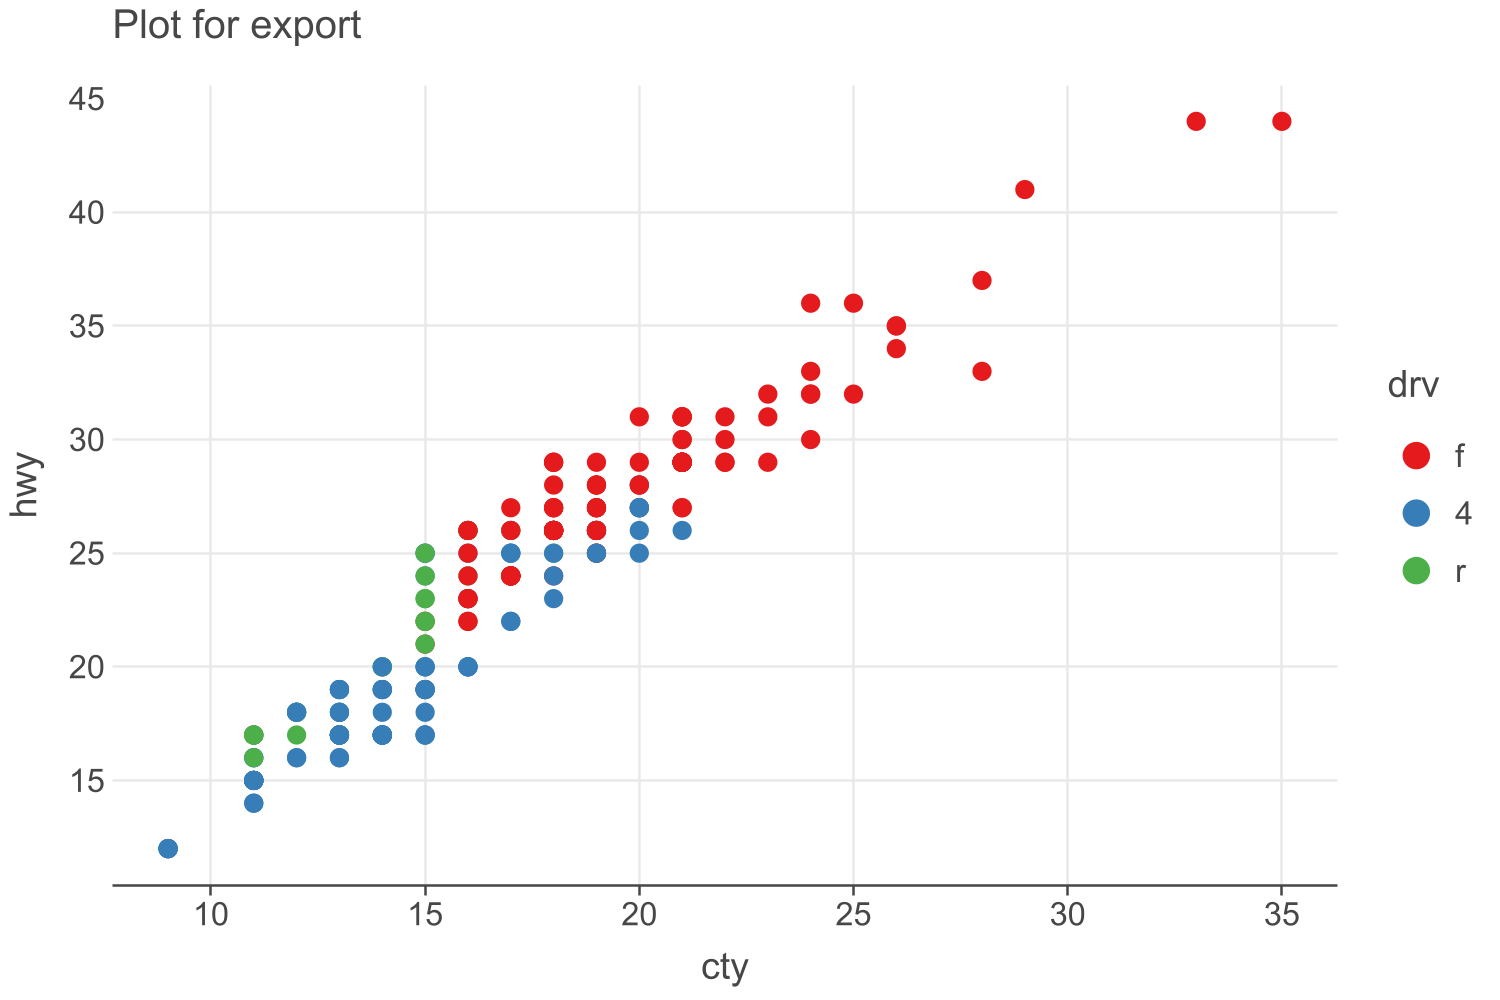

In [58]:
javax.imageio.ImageIO.read(java.io.File(pathPNG))

In addition to saving as a file, you can also export the plot as a `BufferedImage`.
This is particularly useful for further manipulation or display within a Kotlin application:

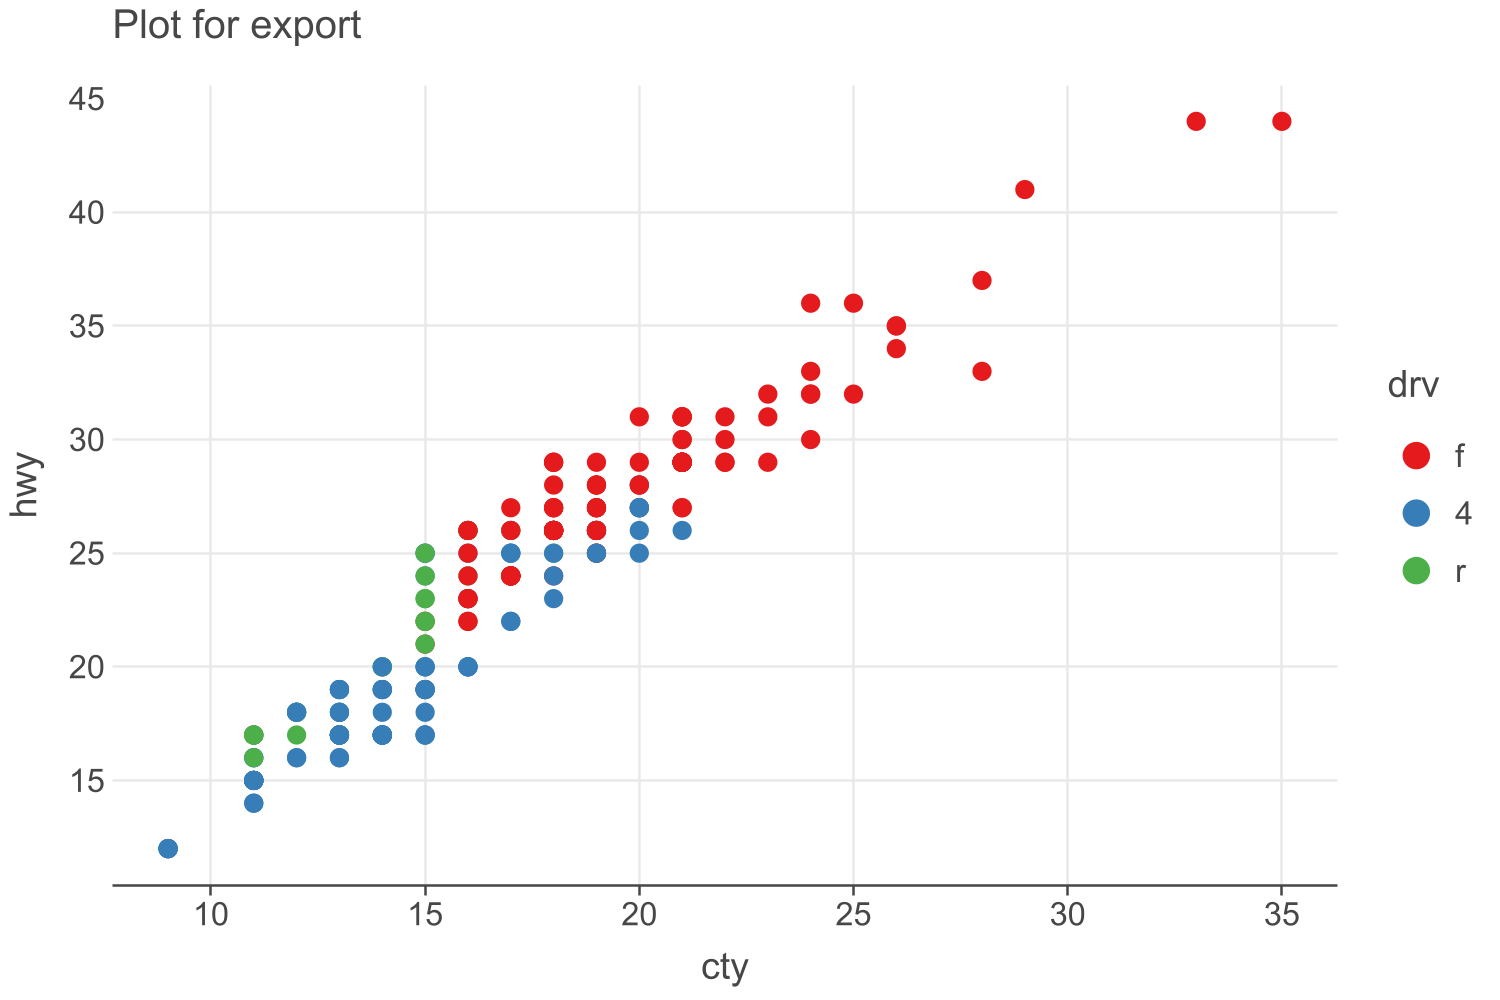

In [59]:
plotForExport.toBufferedImage(scale = 2.5, dpi = 9000)